# This notebook explores the reliability of GAMA spectroscopy candidates by plotting the ratio of z1 and z2, taking minimum thresholds for redshift difference delta-z as limits of lensing probability.
# Edit 6/4/20 - Try to plot these as ELG to PG.

In [17]:
%matplotlib inline
#%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
#from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from mpl_toolkits import mplot3d
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM

In [18]:
# load GAMA and SLACS spec candidates data.
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_with_mass.csv')
slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs_Auger2009.csv')

In [19]:
# assign new column to each, Dz, representing redshift difference
slacs_Dz = slacs.zsrc - slacs.zlens
slacs = slacs.assign(Dz=slacs_Dz)

spec_Dz = abs(spec.z1 - spec.z2)
spec = spec.assign(Dz=spec_Dz)

In [7]:
len(slacs)

85

Text(0.11, 21, '$\\Delta$z = 0.1')

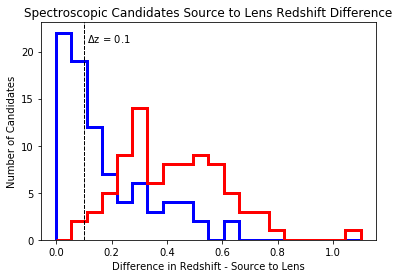

In [5]:
# histogram showing distribution of redshift difference
plt.hist(spec.Dz, range=[0,1.1], bins=20,color='b', histtype = 'step', linewidth=3)
plt.hist(slacs.Dz, range=[0,1.1], bins=20,color='r', histtype = 'step', linewidth=3)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)

plt.xlabel("Difference in Redshift - Source to Lens")
plt.ylabel("Number of Candidates")
plt.title("Spectroscopic Candidates Source to Lens Redshift Difference")
plt.text(0.11, 21,'$\Delta$z = 0.1')

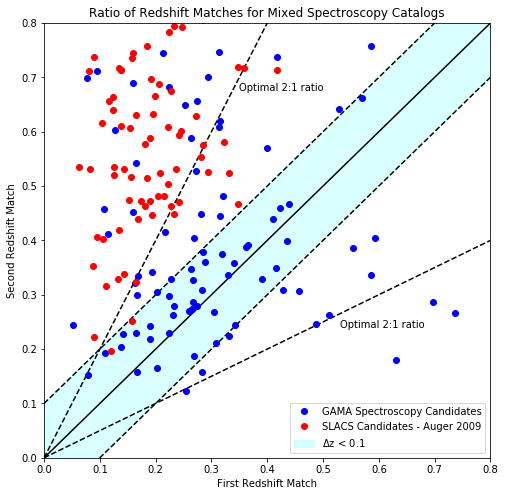

In [7]:
# Scatter plot of GAMA spec and SLACS lens candidate source and
# lens redshift. GAMA spec z1 and z2 do not correspond to 
# lens and source specifically, so the symmetry across the 1:1 line
# should be treated like an absolute value.

fig, ax = plt.subplots(figsize=(8,8)) # square dimensions

x = np.linspace(0, 1, 1000)
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.8)
#X = spec.z1
#Y = spec.z2
ax.plot(x, x, 'k-') # line of slope 1
ax.plot(x, 2*x, 'k--') # line of slope 2
ax.plot(x, 1/2*x, 'k--') # line of slope 1/2
ax.plot(x, x+0.1, 'k--') # Dz = 0.1
ax.plot(x, x-0.1, 'k--') # Dz = 0.1
#ax.plot(x, 3*x, 'c-') # line of slope 2
#ax.plot(x, 1/3*x, 'c-') # line of slope 1/2
#ax.plot(x, 3*x, 'k-') # line of slope 3
#ax.plot(x, 5/2*x, 'k-') # line of slope 5/2
plt.plot(spec.z1, spec.z2, 'bo', label='GAMA Spectroscopy Candidates')
plt.plot(slacs.zlens, slacs.zsrc, 'ro', label='SLACS Candidates - Auger 2009')
#ax.plot(x, 2*x+0.15,'c:')
#ax.plot(x, 2*x-0.15,'c:')
plt.fill_between(x, x-0.1, x+0.1, # Fill region for false candidates
                 facecolor="cyan", # The fill color
                 color='cyan',       # The outline color
                 alpha=0.15, # Transparency of the fill
                label='$\Delta$z < 0.1') 


plt.xlabel("First Redshift Match")# - PG")
plt.ylabel("Second Redshift Match")# - ELG")
plt.title("Ratio of Redshift Matches for Mixed Spectroscopy Catalogs")
plt.legend(loc='best')
plt.text(0.35,0.675, "Optimal 2:1 ratio")
plt.text(0.53, 0.24, "Optimal 2:1 ratio")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/spec_z1_vs_z2.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/spec_z1_vs_z2.pdf')
plt.show()

## From above plot, I have chosen Dz > 0.1 for reliable lenses. This results in 47 candidates of the GAMA Spectroscopy catalog.

In [7]:
spec_candidates = spec[spec.Dz > 0.1]
len(spec_candidates)

47

In [8]:
len(spec[spec.Dz > 0.2])

25

In [10]:
spec_candidates.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_candidates_021320.csv')

# 6/4/20 Plot in terms of ELG and PG

In [20]:
# in all cases, the ELG is at higher redshift than the PG
# labels here indicate 1stmatch_2ndmatch
pg_elg = spec[spec.z1 < spec.z2]
elg_pg = spec[spec.z2 < spec.z1]

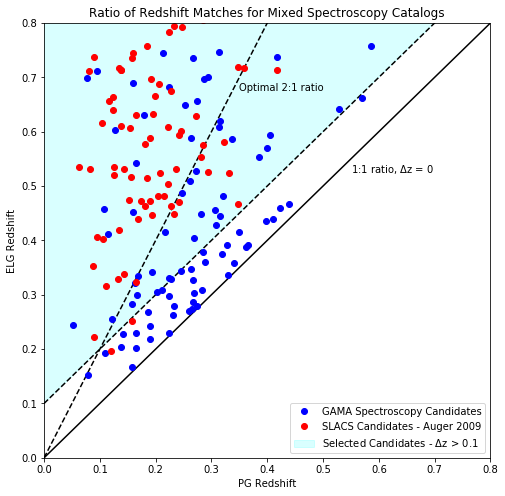

In [26]:
# Scatter plot of GAMA spec and SLACS lens candidate source and
# lens redshift. GAMA spec z1 and z2 do not correspond to 
# lens and source specifically, so the symmetry across the 1:1 line
# should be treated like an absolute value.

fig, ax = plt.subplots(figsize=(8,8)) # square dimensions

x = np.linspace(0, 1, 1000)
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.8)
#X = spec.z1
#Y = spec.z2
ax.plot(x, x, 'k-') # line of slope 1
ax.plot(x, 2*x, 'k--') # line of slope 2
#ax.plot(x, 1/2*x, 'k--') # line of slope 1/2
ax.plot(x, x+0.1, 'k--') # Dz = 0.1
#ax.plot(x, x-0.1, 'k--') # Dz = 0.1
#ax.plot(x, 3*x, 'c-') # line of slope 2
#ax.plot(x, 1/3*x, 'c-') # line of slope 1/2
#ax.plot(x, 3*x, 'k-') # line of slope 3
#ax.plot(x, 5/2*x, 'k-') # line of slope 5/2
plt.plot(pg_elg.z1, pg_elg.z2, 'bo', label='GAMA Spectroscopy Candidates')
plt.plot(elg_pg.z2, elg_pg.z1, 'bo')
plt.plot(slacs.zlens, slacs.zsrc, 'ro', label='SLACS Candidates - Auger 2009')
#ax.plot(x, 2*x+0.15,'c:')
#ax.plot(x, 2*x-0.15,'c:')
plt.fill_between(x, x+0.1, 1, # Fill region for false candidates
                 facecolor="cyan", # The fill color
                 color='cyan',       # The outline color
                 alpha=0.15, # Transparency of the fill
                label='Selected Candidates - $\Delta$z > 0.1') 


plt.xlabel("PG Redshift")# - PG")
plt.ylabel("ELG Redshift")# - ELG")
plt.title("Ratio of Redshift Matches for Mixed Spectroscopy Catalogs")
plt.legend(loc='best')
plt.text(0.35,0.675, "Optimal 2:1 ratio")
plt.text(0.55, 0.525, "1:1 ratio, $\Delta$z = 0")
#plt.text(0.53, 0.24, "Optimal 2:1 ratio")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/spec_z1_vs_z2.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/spec_elg_vs_pg.pdf')
plt.show()

In [28]:
# Get average of ratio of z_elg to z_pg of selected spec candidates

(np.mean(pg_elg[pg_elg.Dz > 0.1].z2/pg_elg[pg_elg.Dz > 0.1].z1))*34/47+(np.mean(elg_pg[elg_pg.Dz > 0.1].z1/elg_pg[elg_pg.Dz > 0.1].z2))*13/47

2.516951402107938

In [25]:
print(len(pg_elg[pg_elg.Dz > 0.1]),
      len(elg_pg[elg_pg.Dz > 0.1]))

34 13


In [16]:
pg_elg.Dz

0     0.158
1     0.320
2     0.167
3     0.475
4     0.295
8     0.622
9     0.165
10    0.148
11    0.132
12    0.349
13    0.383
14    0.161
16    0.172
18    0.129
19    0.101
20    0.113
21    0.618
24    0.169
25    0.530
27    0.325
28    0.529
29    0.198
30    0.407
31    0.378
32    0.458
33    0.433
36    0.255
37    0.396
38    0.304
39    0.292
41    0.194
42    0.296
44    0.135
45    0.103
Name: Dz, dtype: float64